# WebScrapping Project

Gallet Guillaume - Audrey Dreys - Shubham Saini - Manisha Rawla

## Part 3 - Linkedin Relations.

### 1. Import.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import selenium
import getpass
import time 
import re
from time import sleep
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait 
import pandas as pd
from selenium.common.exceptions import NoSuchElementException
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import pandas as pd
import getpass
import numpy as np
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup
import pandas as pd
import requests
from tqdm import tqdm
pd.set_option('display.max_colwidth', None)

### Functions.

In [49]:
def find_unique_sequence_langue(soup):
    id_element = soup.find('li', class_='pvs-list__paged-list-item artdeco-list__item pvs-list__item--line-separated pvs-list__item--one-column')

    if id_element:
        unique_sequence = id_element.get('id').split('-')[1]
        print(unique_sequence)
        unique_sequence2 = id_element.get('id').split('-')[2]
        print(unique_sequence2)
        if unique_sequence2 != 'LANGUAGES':
            return unique_sequence + "-" + unique_sequence2
        else : 
            return unique_sequence
    return None

def find_unique_sequence_entreprise(soup):
    id_element = soup.find('li', class_='pvs-list__paged-list-item artdeco-list__item pvs-list__item--line-separated pvs-list__item--one-column')

    if id_element:
        unique_sequence = id_element.get('id').split('-')[1]
        unique_sequence2 = id_element.get('id').split('-')[2]
        if unique_sequence2 != 'INTERESTS':
            return unique_sequence + "-" + unique_sequence2
        else : 
            return unique_sequence
    return None

def find_unique_sequence_relation(soup):
    button_element = soup.find('button', class_='search-navigation-panel__button', text=lambda x: x and "Personnes" in x.strip())
    
    if button_element:
        unique_sequence = button_element.get('data-target-section-id')
        return unique_sequence
        
    return None

def find_unique_sequence_relation2(soup):
    main_container = soup.find('div', class_='search-results-container')

    if main_container:
        div_elements = main_container.find('div', recursive=False)

        if div_elements:
            target_div = div_elements.get('id')

            if target_div:
                return str(target_div)
            
    return None

def find_unique_sequence_relation3(soup):
    main_container = soup.find('div', class_='search-results-container')

    if main_container:
        div_elements = main_container.find_all('div', recursive=False)

        if len(div_elements) >= 2:
            target_div = div_elements[1].get('id')

            if target_div:
                return str(target_div)
            
    return None
    
def find_unique_ember_relation0(soup):
    ember = np.linspace(0, 29999, 30000)
    ember_possibility = []

    for el in ember:
        ember_possibility.append("ember" + str(int(el)))

    ember_final = 0

    for ember in ember_possibility:
        entreprises_button = soup.find('div', {'id': ember, 'class': 'self-focused ember-view'})
        
        if entreprises_button:
            ember_final = int(ember[5:])+1
            ember_final2 = "ember"+str(int(ember_final))
            return ember_final2

    return None

def find_unique_ember_relation01(soup):
    ember = np.linspace(0, 29999, 30000)
    ember_possibility = []

    for el in ember:
        ember_possibility.append("ember" + str(int(el)))

    ember_final = 0

    for ember in ember_possibility:
        entreprises_button = soup.find('a', {'id': ember, 'class': 'ember-view mn-community-summary__link link-without-hover-state'})
        
        if entreprises_button:
            ember_final = int(ember[5:])
            ember_final2 = "ember"+str(int(ember_final))
            return ember_final2

    return None

def find_unique_ember_relation(soup):
    ember = np.linspace(0, 29999, 30000)
    ember_possibility = []

    for el in ember:
        ember_possibility.append("ember" + str(int(el)))

    ember_final = 0

    for ember in ember_possibility:
        entreprises_button = soup.find('img', {'id': ember, 'class': 'presence-entity__image'})
        
        if entreprises_button and "https://media.licdn.com/dms/image/" in entreprises_button.get('src') and "Guillaume Gallet" not in entreprises_button.get('alt', ''):
            ember_final = ember  
            return ember_final

    return None

def find_unique_ember_relation2(soup):
    ember = np.linspace(0, 99999, 100000)
    ember_possibility = []

    for el in ember:
        ember_possibility.append("ember" + str(int(el)))

    ember_final = 0

    for ember in tqdm(ember_possibility, desc="Searching for unique ember relation2", unit=" ember"):
        entreprises_button = soup.find('a', {'id': ember, 'class': 'ember-view'})
        
        if entreprises_button and "/search/results/people" in entreprises_button.get('href'):
            ember_id = entreprises_button.get('id')
            ember_final = ember  
            return ember_final
            
    return None

def find_unique_ember_relation3(soup):
    ember = np.linspace(0, 9999, 10000)
    ember_possibility = []

    for el in ember:
        ember_possibility.append("ember" + str(int(el)))

    ember_final = 0

    for ember in tqdm(ember_possibility, desc="Searching for unique ember relation3", unit=" ember"):
        entreprises_button = soup.find('button', {'id': ember, 'class': 'artdeco-pagination__button'})
        
        if entreprises_button and "Suivant" in entreprises_button.find('span', class_='artdeco-button__text').get_text():
            ember_id = entreprises_button.get('id')
            ember_final = ember  
            return ember_final
    
    return None

def find_unique_ember_relation4(soup, i):
    ember = np.linspace(0, 99999, 100000)
    ember_possibility = ["ember" + str(int(el)) for el in ember]

    ember_final = 0
    k=1

    if i == 1:
        for ember in tqdm(ember_possibility, desc="Searching for unique ember relation4", unit=" ember"):
            entreprises_button = soup.find('a', {'id': ember, 'class': 'ember-view mn-connection-card__link'})

            if entreprises_button:
                ember = entreprises_button.get('id')
                ember_final = ember
                return ember_final

    else:
        while True:       
            for ember in tqdm(ember_possibility, desc="Searching for k unique ember relation4", unit=" ember"):
                entreprises_button = soup.find('a', {'id': ember, 'class': 'ember-view mn-connection-card__link'})
                if k != i:
                    if entreprises_button:
                        ember = entreprises_button.get('id')
                        ember_final = ember
                        ember = np.linspace(int(ember_final[5:]), 99999, 99999 - int(ember_final[5:]))
                        k+=1
                else :
                    if entreprises_button:
                        ember = entreprises_button.get('id')
                        ember_final = ember
                        ember = np.linspace(int(ember_final[5:]), 99999, 99999 - int(ember_final[5:]))
                        return ember_final 
                        
    return None

def find_unique_ember_relation5(soup):
    ember = np.linspace(0, 99999, 100000)
    ember_possibility = []

    for el in ember:
        ember_possibility.append("ember" + str(int(el)))

    ember_final = 0

    for ember in tqdm(ember_possibility, desc="Searching for unique ember relation5", unit=" ember"):
        entreprises_button = soup.find('a', {'id': ember, 'class': 'ember-view pv-text-details__about-this-profile-entrypoint'})
        
        if entreprises_button and "overlay/about-this-profile" in entreprises_button.get('href'):
            ember_id = entreprises_button.get('id')
            ember_final = ember  
            return ember_final
            
    return None

def remove_duplicates(input_string):
    if input_string is not None:
        words = input_string.split()
        unique_words = set(words)
        result_string = ' '.join(unique_words)
        return result_string
    else:
        return None
    
def remove_and_skip_lines(input_string):
    cleaned_string = input_string.replace('\n', ' ')
    return cleaned_string

### Connect to Linkedin.

In [148]:
options = webdriver.ChromeOptions()
options.add_argument("start-maximized")
options.add_experimental_option("excludeSwitches", ['enable-automation'])
driver = webdriver.Chrome(options=options)
driver.get("https://www.linkedin.com/checkpoint/rm/sign-in-another-account?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin")
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/div/main/div[1]/div/section/div/div[2]/button[1]").click()
time.sleep(2)
driver.find_element("id","username").send_keys("guillaume.gallet@edu.devinci.fr")
time.sleep(2)
p = getpass.getpass()
driver.find_element("id","password").send_keys(p)
time.sleep(1)
driver.find_element(By.XPATH,"/html/body/div/main/div[2]/div[1]/form/div[3]/button").send_keys(Keys.ENTER)

········


### Scrap all relations ofhis own relations.

In [ ]:
y=0
templist = []
temp = 1
i=1
r4 = 0
while temp <= 2:
    try: # clic sur la personne
        r4+=1
        r3 = 0
        r1 = 1 
        r2 = 1
        for timer in range(0, r4):
            driver.execute_script("window.scrollTo(0, "+str(y)+")")
            y += 50
        src = driver.page_source
        soup = BeautifulSoup(src, 'html.parser')
        unique_ember = find_unique_ember_relation4(soup,i)
        if unique_ember is None : 
            break
        driver.find_element(By.XPATH, f"//*[@id='{unique_ember}']/span[2]").click()
        time.sleep(1)
        i+=1
        
         # clic sur les relations
        try :  
            r1=1
            time.sleep(1)
            src = driver.page_source
            soup = BeautifulSoup(src, 'html.parser')
            a_element = soup.find('a', {'id': re.compile('ember'), 'href': re.compile('connection'), 'class': 'ember-view'})
            if a_element is not None:
                temp+=1
                src = driver.page_source
                soup = BeautifulSoup(src, 'html.parser')
                unique_ember = find_unique_ember_relation2(soup)
                if unique_ember is None : 
                    break
                driver.find_element(By.XPATH, f"//*[@id='{unique_ember}']/span").click()
                time.sleep(1)
                
                while True:
                    try:
                        while r1 <= 3:
                            element_dict = {}
                            src = driver.page_source
                            soup = BeautifulSoup(src, 'html.parser')
                            unique_sequence = find_unique_sequence_relation2(soup)
                            r = 3
                            element_dict = {}
                            try :
                                Name = driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]/div/ul/li[{r1}]/div/div/div/div[2]/div[1]/div[1]/div/span[1]/span/a/span/span[1]").text
                            except NoSuchElementException:
                                Name = "NaN"
                            try :
                                Job = driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]/div/ul/li[{r1}]/div/div/div/div[2]/div[1]/div[2]").text
                            except NoSuchElementException:
                                Job = "NaN"
                            try :
                                Place = driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]/div/ul/li[{r1}]/div/div/div/div[2]/div[1]/div[3]").text
                            except NoSuchElementException:
                                Place = "NaN"
                                Job = "NaN"
                            driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]/div/ul/li[{r1}]/div/div/div/div[2]/div[1]/div[1]/div/span[1]/span/a/span/span[1]").click()
                            time.sleep(1)
                            while r <= 15:
                                try:
                                    element1 = driver.find_element(By.XPATH, f"//*[@id=\"profile-content\"]/div/div[2]/div/div/main/section[{r}]/div[2]/div/div/div/h2/span[1]").text
                                    element2 = driver.find_element(By.XPATH, f"//*[@id=\"profile-content\"]/div/div[2]/div/div/main/section[{r}]/div[3]").text
                            
                                    element2 = remove_and_skip_lines(element2)
                                    #element2 = remove_duplicates(element2)
                            
                                    element_dict[element1] = element2
                            
                                except NoSuchElementException:
                                    pass
                                r += 1
                                
                            driver.back()
                            time.sleep(1)
                            #for timer in range(0, r1):
                                #driver.execute_script("window.scrollTo(0, "+str(y)+")")
                                # y += 50
                            time.sleep(1)
                            y = 0
                            Table_dict = {
                                'Name': Name,
                                'Job': Job,
                                'Place': Place
                                }
                            Table_dict.update(element_dict) 
                            templist.append(Table_dict)
                            df = pd.DataFrame(templist)
                            r1 += 1
                            
                    except NoSuchElementException:
                        break
                
                    if r2 == 1 or r2 == 4:
                        r2 = 1
                        r3 += 1
                        try:
                            time.sleep(1)
                            src = driver.page_source
                            soup = BeautifulSoup(src, 'html.parser')
                            unique_ember = find_unique_ember_relation3(soup)
                            if unique_ember is None :
                                driver.back()
                                driver.back()
                                time.sleep(2)
                                break
                            driver.find_element(By.XPATH, f"//*[@id=\"{unique_ember}\"]").click()
                            time.sleep(1)
                
                            while r2 <= 3:
                                element_dict = {} 
                                src = driver.page_source
                                soup = BeautifulSoup(src, 'html.parser')
                                unique_sequence = find_unique_sequence_relation3(soup)
                                try :
                                    Name = driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]/div/ul/li[{r2}]/div/div/div/div[2]/div[1]/div[1]/div/span[1]/span/a/span/span[1]").text
                                except NoSuchElementException:
                                    Name = "NaN"
                                try :
                                    Job = driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]/div/ul/li[{r2}]/div/div/div/div[2]/div[1]/div[2]").text
                                except NoSuchElementException:
                                    Job = "NaN"
                                try :
                                    Place = driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]/div/ul/li[{r2}]/div/div/div/div[2]/div[1]/div[3]").text
                                except NoSuchElementException:
                                    Place = "NaN"
                                    Job = "NaN"    
                                driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]/div/ul/li[{r2}]/div/div/div/div[2]/div[1]/div[1]/div/span[1]/span/a/span/span[1]").click()
                                time.sleep(1)
                                while r <= 15:
                                    try:
                                        element1 = driver.find_element(By.XPATH, f"//*[@id=\"profile-content\"]/div/div[2]/div/div/main/section[{r}]/div[2]/div/div/div/h2/span[1]").text
                                        element2 = driver.find_element(By.XPATH, f"//*[@id=\"profile-content\"]/div/div[2]/div/div/main/section[{r}]/div[3]").text
                                        
                                        element2 = remove_and_skip_lines(element2)
                                        #element2 = remove_duplicates(element2)
                                        
                                        element_dict[element1] = element2
                                    
                                    except NoSuchElementException:
                                        pass
                                    r += 1
                                    
                                driver.back()
                                time.sleep(1)
                                #for timer in range(0, r2):
                                    #driver.execute_script("window.scrollTo(0, "+str(y)+")")
                                    #y += 50
                                time.sleep(1)
                                y = 0
                                Table_dict = {
                                'Name': Name,
                                'Job': Job,
                                'Place': Place
                                }
                                Table_dict.update(element_dict) 
                                templist.append(Table_dict)
                                df = pd.DataFrame(templist)
                                r2 += 1
                                
                        except NoSuchElementException:
                            break
                
                    if r3 >= 2:
                        driver.back()
                        driver.back()
                        time.sleep(2)
                        break
                        
            if a_element is None:
                print("Impossible d'accéder aux relations de cette personne.")
                temp+=1
                driver.back()
                time.sleep(2)
                continue
                
        except NoSuchElementException:
            break

    except NoSuchElementException:
        break

In [ ]:
df

In [ ]:
df.to_csv("C:/Users/Guillaume/Documents/Webscrapping/webscrapping.csv", index=False, encoding='utf-8-sig', sep=',')

### Scrap every informations about x person from who we want.

In [50]:
p = input("Entrer le nom prénom voulu: ")
driver.find_element(By.XPATH,"//*[@id=\"global-nav-typeahead\"]/input").send_keys(p)
time.sleep(1)
driver.find_element(By.XPATH,"//*[@id=\"global-nav-typeahead\"]/input").send_keys(Keys.ENTER)
time.sleep(1)
try:
    src = driver.page_source
    soup = BeautifulSoup(src, 'html.parser')
    unique_sequence = find_unique_sequence_relation(soup)
    driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]/div/div[2]").click()
    time.sleep(1)
    src = driver.page_source
    soup = BeautifulSoup(src, 'html.parser')
    unique_ember = find_unique_ember_relation(soup)
    driver.find_element(By.XPATH, f"//*[@id=\"{unique_ember}\"]").click()
except NoSuchElementException:
    src = driver.page_source
    soup = BeautifulSoup(src, 'html.parser')
    unique_sequence = find_unique_sequence_relation2(soup)    
    driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]/div/ul/li/div/a/div/div[1]/div[1]/div/div/span[1]/span/a/span/span[1]").click()
    time.sleep(1)

Entrer le nom prénom voulu: Guillaume Guérard


In [150]:
templist = []
temp = 1
while temp <= 500:
 # scrap les info de la personne 
    r1 = np.random.randint(1, 5)
    r=0
    temp+=1
    element_dict = {}
    src = driver.page_source
    soup = BeautifulSoup(src, 'html.parser')
    unique_sequence = find_unique_ember_relation5(soup)
    element_dict = {}
    try :
        Name = driver.find_element(By.XPATH, f"//*[@id=\"{unique_sequence}\"]").text
    except NoSuchElementException:
        Name = "NaN"
    try :
        Job = driver.find_element(By.XPATH, f"//*[@id=\"profile-content\"]/div/div[2]/div/div/main/section[1]/div[2]/div[2]/div[1]/div[2]").text
    except NoSuchElementException:
        Job = "NaN"
    try :
        Place = driver.find_element(By.XPATH, f"//*[@id=\"profile-content\"]/div/div[2]/div/div/main/section[1]/div[2]/div[2]/div[2]/span[1]").text
    except NoSuchElementException:
        Place = "NaN"
        Job = "NaN"
    time.sleep(1)
    while r <= 15:
        try:
            element1 = driver.find_element(By.XPATH, f"//*[@id=\"profile-content\"]/div/div[2]/div/div/main/section[{r}]/div[2]/div/div/div/h2/span[1]").text
            element2 = driver.find_element(By.XPATH, f"//*[@id=\"profile-content\"]/div/div[2]/div/div/main/section[{r}]/div[3]").text

            element2 = remove_and_skip_lines(element2)
            #element2 = remove_duplicates(element2)

            element_dict[element1] = element2

        except NoSuchElementException:
            pass
        r += 1

    time.sleep(1)
    Table_dict = {
        'Name': Name,
        'Job': Job,
        'Place': Place
        }
    Table_dict.update(element_dict) 
    templist.append(Table_dict)
    df2 = pd.DataFrame(templist)         
    
    #Click sur une autre personne
    time.sleep(1)
    driver.find_element(By.XPATH, f"//*[@id=\"profile-content\"]/div/div[2]/div/div/aside/section[2]/div[3]/ul/li[{r1}]/div/div[2]/div[1]/a/div[1]/div/div/div/span[1]").click()
    time.sleep(1)
    

Searching for unique ember relation5:   0%|                                   | 32/100000 [00:00<11:31, 144.54 ember/s]


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="profile-content"]/div/div[2]/div/div/aside/section[2]/div[3]/ul/li[1]/div/div[2]/div[1]/a/div[1]/div/div/div/span[1]"}
  (Session info: chrome=120.0.6099.200); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF65D952142+3514994]
	(No symbol) [0x00007FF65D570CE2]
	(No symbol) [0x00007FF65D4176AA]
	(No symbol) [0x00007FF65D461860]
	(No symbol) [0x00007FF65D46197C]
	(No symbol) [0x00007FF65D4A4EE7]
	(No symbol) [0x00007FF65D48602F]
	(No symbol) [0x00007FF65D4A28F6]
	(No symbol) [0x00007FF65D485D93]
	(No symbol) [0x00007FF65D454BDC]
	(No symbol) [0x00007FF65D455C64]
	GetHandleVerifier [0x00007FF65D97E16B+3695259]
	GetHandleVerifier [0x00007FF65D9D6737+4057191]
	GetHandleVerifier [0x00007FF65D9CE4E3+4023827]
	GetHandleVerifier [0x00007FF65D6A04F9+689705]
	(No symbol) [0x00007FF65D57C048]
	(No symbol) [0x00007FF65D578044]
	(No symbol) [0x00007FF65D5781C9]
	(No symbol) [0x00007FF65D5688C4]
	BaseThreadInitThunk [0x00007FF864197344+20]
	RtlUserThreadStart [0x00007FF865AC26B1+33]


In [151]:
df2

Name  \
0                  Thomas Blasi   
1              Gonzalo GARCIA 🟦   
2      Lakshmana Raja SAKTHIVEL   
3   Charles Martin Raj Pidakala   
4             Jaykant Mendapara   
5   Charles Martin Raj Pidakala   
6                      Anita S.   
7            Stefan van Riessen   
8     Kristin Rosenquist Olsson   
9              Sabine Dombrecht   
10        Margo van den Elshout   
11        Ida Erikstad Pedersen   
12        Helene Kjørvel-Hansen   
13               Vibeke Thomsen   
14             Lau Kjær Knudsen   
15              Lena Østergaard   
16         Pernille Landbo Bunk   
17        Rasmus Pagh Andreasen   
18                 Peter Bødker   
19             Lau Kjær Knudsen   
20               Vibeke Thomsen   
21               Kildeby, Mette   
22         Louise Myrup Nielsen   
23                   Gitte Noes   
24           Anja Kloster Kinze   
25               Helle Guldmann   
26   Camilla (Thomsen) Sejersen   
27            Claus Christensen   
28        Kristina Frank Nissen   
29    Louise Thornfeldt Eriksen   
30        Kristina Frank Nissen   
31            Claus Christensen   
32                Lone Jakobsen   
33               Gaétan Patruno   
34               Gautier Luisin   
35                Tristan Bonal   
36              Steeve Guyonnet   
37                Iuliia Reiner   
38                    Damien C.   
39                Jordan Couret   
40     Gountante Aziz LILOUDINI   
41              Geoffrey WIOTTE   
42             Michael Barbasso   
43               Mégane Moreira   
44               Solène MEURICE   
45              Augustin Buchet   
46                Claire Gourcy   
47                Zoé Espinasse   
48                Claire Gourcy   
49           Emmanuelle Quinsat   
50               Philippe Girou   
51                 Alix Duthoit   
52                  Julia Phung   
53              Melvil Bonnefoy   
54                 Alix Duthoit   
55                 Anaïk Gouges   
56                 Julien Faure   
57                 Anaïk Gouges   
58                 Julien Faure   
59              Victoire MOHEBI   
60                Art Valvekens   
61            Fleuriane Lehmann   
62                Art Valvekens   
63                  Julia Phung   
64            Fleuriane Lehmann   
65                Art Valvekens   
66              Melvil Bonnefoy   
67                  Julia Phung   
68               Khadidja Aoued   
69                 Alix Duthoit   
70              Melvil Bonnefoy   
71                  Julia Phung   
72               Khadidja Aoued   
73              Abdelali Merhom   
74         Olivier Legrand, PhD   
75               Benjamin Marlé   
76                 Lionel Louis   
77          Antoine Bosché 👨🏻‍💻   
78        Kevin Rosamont Prombo   
79               Benjamin Tabet   
80        Kevin Rosamont Prombo   
81       Blandine JATSA NGUETSE   
82                Teddy Bayssac   
83            Daria Kolesnikova   
84                Morteza Fazel   
85            Maryna Solovarova   
86                  Linus Jones   
87                  Giang H. Vu   
88                     Son Pham   
89                   Duc Nguyen   
90                     Khanh Le   
91                   Duc Nguyen   
92       Damien Quang Trung Dam   

                                                                                                                                                                                                                 Job  \
0                                                                                                                                                     Data Engineering | Ex-Amazon | MiM and MSc Data Analytics & AI   
1                                                                                                                                                              Data Scientist @Cognizant | Banking | Retail | @EDHEC   
2                                                                                       

In [152]:
df2.to_csv("C:/Users/Guillaume/Documents/Webscrapping/webscrapping2.csv", index=False, encoding='utf-8-sig', sep=',')

### Work With The Dataset We Created.

### Manipulation of The Dataset.

In [1]:
import pandas as pd
import re
from unidecode import unidecode
import langid
import nltk
from nltk.corpus import stopwords
from langid.langid import LanguageIdentifier, model
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
from deep_translator import GoogleTranslator
from tqdm import tqdm

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

C:\Users\Guillaume\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Guillaume\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Guillaume\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Guillaume\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
def remove_empty_spaces(languages):
    return [lang.strip() for lang in languages if lang.strip()]

def remove_stopwords_in_list(word_list):
    stop_words = set(stopwords.words('french'))

    filtered_words = [word for word in word_list if word.lower() not in stop_words]

    return filtered_words

def remove_stopwords_in_dataset(dataset):
    dataset_without_stopwords = dataset.map(remove_stopwords_in_list)
    return dataset_without_stopwords

def translate_french_to_english(words):
    translated_words = []

    for word in words:
        try:
            translated_word = GoogleTranslator(source='fr', target='en').translate(word)
            translated_words.append(translated_word)
        except Exception as e:
            translated_words.append(word)
            print(f"Warning: Unable to translate '{word}' to English. Keeping the original word.")

    return translated_words

def translate_french_words_in_dataset(dataset):
    translated_dataset = dataset.map(translate_french_to_english)
    return translated_dataset

def clean(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', unidecode(str(text).lower()))
    cleaned_words = [word for word in cleaned_text.split() if len(word) > 3]
    return cleaned_words

def clean_dataset(dataset):
    cleaned_dataset = dataset.map(clean)
    return cleaned_dataset

def remove_duplicate_words(words):
    unique_words = []
    seen_words = set()
    for word in words:
        if word not in seen_words:
            seen_words.add(word)
            unique_words.append(word)
    return unique_words

def remove_duplicate_words_in_dataset(dataset):
    cleaned_dataset = dataset.map(remove_duplicate_words)
    return cleaned_dataset

def tokenize_and_list(sentence):
    words = re.findall(r'\b\w+\b', str(sentence))
    return words

def convert_list_to_string(row):
    return ' '.join(map(str, row))

def convert_lists_in_dataset(dataset):
    converted_dataset = dataset.map(lambda x: convert_list_to_string(x) if isinstance(x, list) else str(x))
    return converted_dataset

In [398]:
data = pd.read_csv("C:/Users/Guillaume/Documents/Webscrapping/webscrapping.csv", sep=',')
df_clean = pd.read_csv("C:/Users/Guillaume/Documents/Webscrapping/df_clean.csv", sep=',')
df_clean2 = pd.read_csv("C:/Users/Guillaume/Documents/Webscrapping/df_clean2.csv", sep=',')

In [399]:
#df_clean2 = data2.drop_duplicates(subset='Name', keep='first')

In [400]:
#df_clean2 = df_clean2.map(tokenize_and_list)

In [401]:
#df_clean2 = clean_dataset(df_clean2)

In [402]:
#df_clean2 = remove_duplicate_words_in_dataset(df_clean2)

In [403]:
#df_clean2 = translate_french_words_in_dataset(df_clean2)

In [404]:
#----------------------------------------

In [405]:
df_clean = clean_dataset(df_clean)
df_clean2 = clean_dataset(df_clean2)

In [406]:
df_clean = remove_stopwords_in_dataset(df_clean)
df_clean2 = remove_stopwords_in_dataset(df_clean2)

In [407]:
df_clean = remove_duplicate_words_in_dataset(df_clean)
df_clean2 = remove_duplicate_words_in_dataset(df_clean2)

In [408]:
df_clean = convert_lists_in_dataset(df_clean)
df_clean2 = convert_lists_in_dataset(df_clean2)

### Remove Useless Columns.

In [409]:
columns_to_remove = ["Infos", "Activité", "Recommandations", "Bénévolat", "L’essentiel", "Résultats d’examens","Cours", 
                     "Licences et certifications","Projets","Centres d’intérêt"]

df_clean = df_clean.drop(columns=columns_to_remove)

In [410]:
columns_to_remove2 = ["Infos", "Activité", "Recommandations", "Bénévolat", "L’essentiel", "Résultats d’examens","Cours", 
                     "Licences et certifications","Projets","Centres d’intérêt","Centres d’intérêt","Recommandations",
                      "Prix et distinctions","Publications","Organisations","Causes","L’essentiel"]

df_clean2 = df_clean2.drop(columns=columns_to_remove2)

### Clean Name.

In [411]:
df_clean = df_clean.drop_duplicates(subset='Name', keep='first')

In [412]:
df_clean2 = df_clean2.drop_duplicates(subset='Name', keep='first')

### Clean Place.

In [413]:
df_clean['Place'] = df_clean['Place'].replace('greater marseille metropolitan area', 'marseille')
df_clean['Place'] = df_clean['Place'].replace('greater lyon area', 'lyon')
df_clean['Place'] = df_clean['Place'].replace('greater paris metropolitan region', 'paris')

In [414]:
df_clean2['Place'] = df_clean2['Place'].str.split().str[0]
df_clean2['Place'] = df_clean2['Place'].replace('jutland', 'denmark')
df_clean2['Place'] = df_clean2['Place'].replace('aalborg', 'denmark')
df_clean2['Place'] = df_clean2['Place'].replace('time', 'No place')
df_clean2['Place'] = df_clean2['Place'].replace('region', 'No place')
df_clean2['Place'] = df_clean2['Place'].replace('cross', 'No place')
df_clean2['Place'] = df_clean2['Place'].replace('horses', 'No place')
df_clean2['Place'] = df_clean2['Place'].replace('fountains', 'No place')
df_clean2['Place'] = df_clean2['Place'].replace('country', 'No place')

### Clean Langues.

In [415]:
words_to_remove_per_row = [['display'], ['languages'], ['compensation'], ['competition'], ['natal'], ['professional']
                          , ['bilingual'], ['bilingual'], ['language'], ['notions '], ['native'], ['capacitis'], ['complete']
                           , ['limited'], ['capacity'], ['comperte'], ['show'], ['level'], ['skill'], ['ability']]

def remove_specific_words(row):
    for words_to_remove in words_to_remove_per_row:
        for word in words_to_remove:
            row = row.replace(word, '')
    return row

df_clean['Langues'] = df_clean['Langues'].apply(remove_specific_words)

In [416]:
words_to_remove_per_row2 = [['bilingual'], ['languages'], ['native'], ['skill'], ['professional'], ['limited'],
                            ['languages'], ['notions'], ['bilingual'], ['ability '], ['complete'], ['skill'], ['notions'],
                           ['display'],['language']]

def remove_specific_words2(row):
    for words_to_remove in words_to_remove_per_row2:
        for word in words_to_remove:
            row = row.replace(word, '')
    return row

df_clean2['Langues'] = df_clean2['Langues'].apply(remove_specific_words2)

In [417]:
rows_with_engels = df_clean2['Langues'].str.contains('engels')
df_clean2.loc[rows_with_engels, 'Langues'] = df_clean2.loc[rows_with_engels, 'Langues'].str.replace('engels', 'english')

rows_with_engels = df_clean2['Langues'].str.contains('englisch')
df_clean2.loc[rows_with_engels, 'Langues'] = df_clean2.loc[rows_with_engels, 'Langues'].str.replace('englisch', 'english')

rows_with_engels = df_clean2['Langues'].str.contains('deutsch')
df_clean2.loc[rows_with_engels, 'Langues'] = df_clean2.loc[rows_with_engels, 'Langues'].str.replace('deutsch', 'german')

rows_with_engels = df_clean2['Langues'].str.contains('frank')
df_clean2.loc[rows_with_engels, 'Langues'] = df_clean2.loc[rows_with_engels, 'Langues'].str.replace('frank', 'french')

rows_with_engels = df_clean2['Langues'].str.contains('deutsch')
df_clean2.loc[rows_with_engels, 'Langues'] = df_clean2.loc[rows_with_engels, 'Langues'].str.replace('deutsch', 'german')

rows_with_engels = df_clean2['Langues'].str.contains('duits')
df_clean2.loc[rows_with_engels, 'Langues'] = df_clean2.loc[rows_with_engels, 'Langues'].str.replace('duits', 'german')

rows_with_engels = df_clean2['Langues'].str.contains('dance')
df_clean2.loc[rows_with_engels, 'Langues'] = df_clean2.loc[rows_with_engels, 'Langues'].str.replace('dance', 'german')

rows_with_engels = df_clean2['Langues'].str.contains('engelsk')
df_clean2.loc[rows_with_engels, 'Langues'] = df_clean2.loc[rows_with_engels, 'Langues'].str.replace('engelsk', 'english')

rows_with_engels = df_clean2['Langues'].str.contains('deutch')
df_clean2.loc[rows_with_engels, 'Langues'] = df_clean2.loc[rows_with_engels, 'Langues'].str.replace('deutch', 'german')

rows_with_engels = df_clean2['Langues'].str.contains('englishk')
df_clean2.loc[rows_with_engels, 'Langues'] = df_clean2.loc[rows_with_engels, 'Langues'].str.replace('englishk', 'english')

In [418]:
df_clean['Langues'] = df_clean['Langues'].str.split(' ')

In [419]:
df_clean2['Langues'] = df_clean2['Langues'].str.split(' ')

In [420]:
df_clean['Langues'] = df_clean['Langues'].apply(remove_empty_spaces)

In [421]:
df_clean2['Langues'] = df_clean2['Langues'].apply(remove_empty_spaces)

In [422]:
langues_counts = {}

for langues_list in df_clean['Langues']:
    for langue in langues_list:
        langues_counts[langue] = langues_counts.get(langue, 0) + 1

df_langues = pd.DataFrame(list(langues_counts.items()), columns=['Langue', 'Occurrences'])

langues_counts = df_langues.set_index('Langue')['Occurrences']

In [423]:
langues_counts2 = {}

for langues_list2 in df_clean2['Langues']:
    for langue2 in langues_list2:
        langues_counts2[langue2] = langues_counts2.get(langue2, 0) + 1

df_langues2 = pd.DataFrame(list(langues_counts2.items()), columns=['Langue', 'Occurrences'])

langues_counts2 = df_langues2.set_index('Langue')['Occurrences']

In [424]:
df_clean['Langues'] = df_clean['Langues'].apply(lambda x: ', '.join(x))

In [425]:
df_clean2['Langues'] = df_clean2['Langues'].apply(lambda x: ', '.join(x))

### Clean Expériences.

In [426]:
words_to_remove_per_row = [['today'], ['june'], ['seven'], ['juil'], ['mars'], ['time'], ['fevr'], ['dazur'], ['month']
                           , ['city'], ['march'], ['august'], ['azure'], ['site'], ['display'], ['region']]


df_clean['Expérience'] = df_clean['Expérience'].apply(remove_specific_words)

In [427]:
words_to_remove_per_row2 = [['today'], ['june'], ['seven'], ['juil'], ['mars'], ['time'], ['fevr'], ['dazur'], ['month']
                           , ['city'], ['march'], ['august'], ['azure'], ['site'], ['display'], ['region']]


df_clean2['Expérience'] = df_clean2['Expérience'].apply(remove_specific_words2)

### Clean Formation.

In [428]:
words_to_remove_per_row = [['display'], ['seven'], ['june'], ['high'], ['mars'], ['time'], ['fevr'], ['dazur'], ['month']
                           , ['city'], ['march'], ['august'], ['azure'], ['site'], ['display'], ['region']]


df_clean['Formation'] = df_clean['Formation'].apply(remove_specific_words)

### Clean Compétences.

In [429]:
words_to_remove_per_row = [['display'], ['skills'], ['house'], ['recommendations']]


df_clean['Compétences'] = df_clean['Compétences'].apply(remove_specific_words)

## Data Visualisation.

### Distribution des lieux.

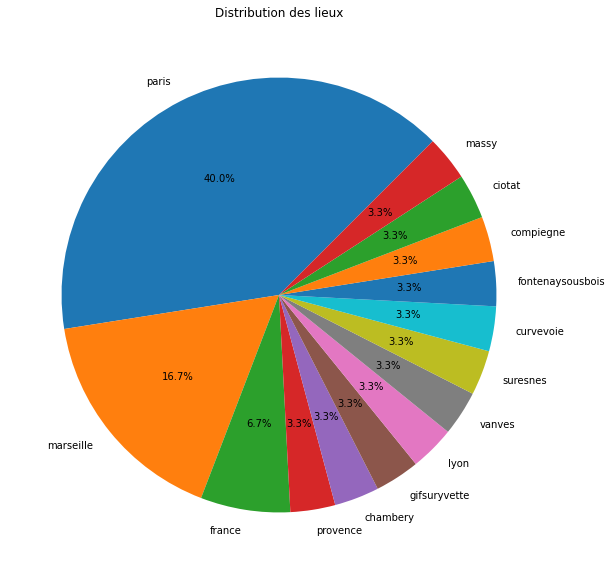

In [430]:
place_counts = df_clean['Place'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(place_counts, labels=place_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Distribution des lieux')
plt.show()

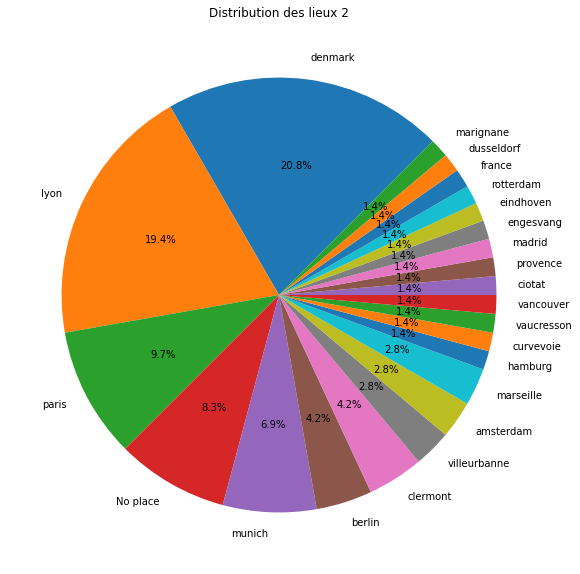

In [431]:
place_counts = df_clean2['Place'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(place_counts, labels=place_counts.index, autopct='%1.1f%%', startangle=45)

plt.xticks(rotation=45)

plt.title('Distribution des lieux 2')
plt.show()

### Distribution des langues.

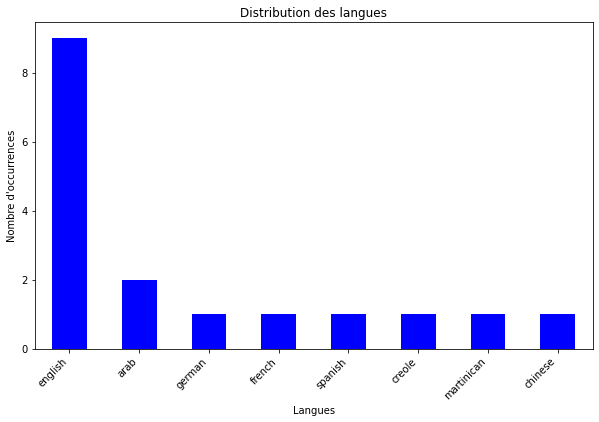

In [432]:
plt.figure(figsize=(10, 6))
langues_counts.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Distribution des langues')
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

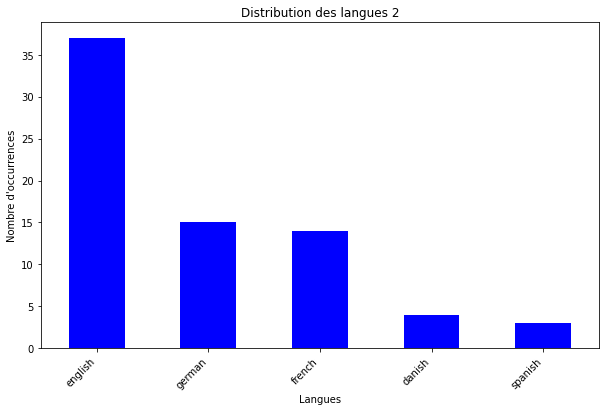

In [433]:
plt.figure(figsize=(10, 6))
langues_counts2.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title('Distribution des langues 2')
plt.xlabel('Langues')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

### Mots les plus utilisés dans la colonne Job.

In [434]:
all_jobs_text = ' '.join(df_clean['Job'])

tokens = word_tokenize(all_jobs_text)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

word_counts = Counter(filtered_tokens)

df_word_counts = pd.DataFrame(list(word_counts.items()), columns=['Mot', 'Occurrences'])

df_word_counts = df_word_counts.sort_values(by='Occurrences', ascending=False)

top_words = df_word_counts.head(30)

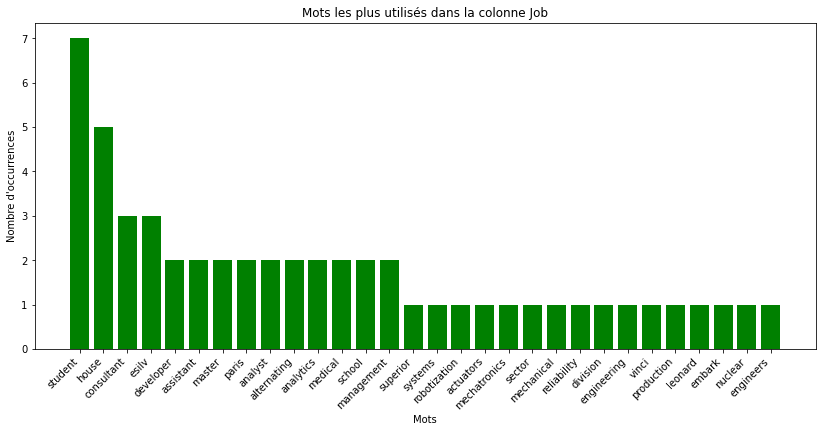

In [435]:
plt.figure(figsize=(14, 6))
plt.bar(top_words['Mot'], top_words['Occurrences'], color='green')
plt.title('Mots les plus utilisés dans la colonne Job')
plt.xlabel('Mots')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

In [436]:
all_jobs_text2 = ' '.join(df_clean2['Job'])

tokens2 = word_tokenize(all_jobs_text2)

stop_words2 = set(stopwords.words('english'))
filtered_tokens2 = [word2.lower() for word2 in tokens2 if word2.isalpha() and word2.lower() not in stop_words2]

word_counts2 = Counter(filtered_tokens2)

df_word_counts2 = pd.DataFrame(list(word_counts2.items()), columns=['Mot', 'Occurrences'])

df_word_counts2 = df_word_counts2.sort_values(by='Occurrences', ascending=False)

top_words2 = df_word_counts2.head(40)

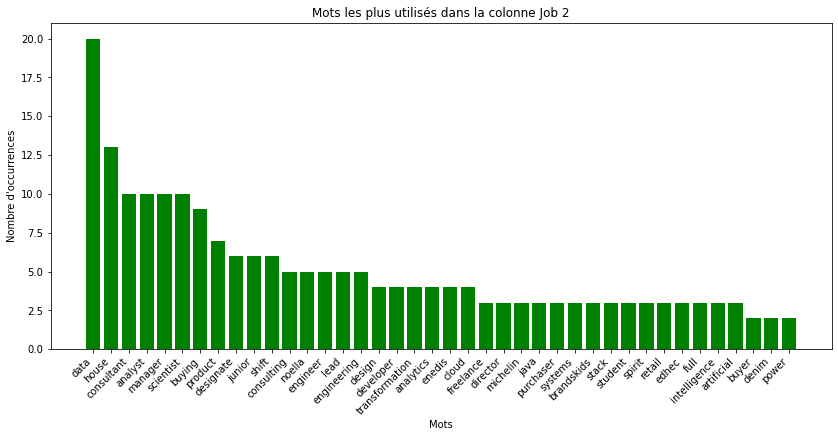

In [437]:
plt.figure(figsize=(14, 6))
plt.bar(top_words2['Mot'], top_words2['Occurrences'], color='green')
plt.title('Mots les plus utilisés dans la colonne Job 2')
plt.xlabel('Mots')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

### Mots les plus utilisés dans la colonne Expérience.

In [438]:
all_infos_text = ' '.join(df_clean['Expérience'])

tokens = word_tokenize(all_infos_text)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

word_counts = Counter(filtered_tokens)

df_word_counts = pd.DataFrame(list(word_counts.items()), columns=['Mot', 'Occurrences'])

df_word_counts = df_word_counts.sort_values(by='Occurrences', ascending=False)

top_words = df_word_counts.head(50)

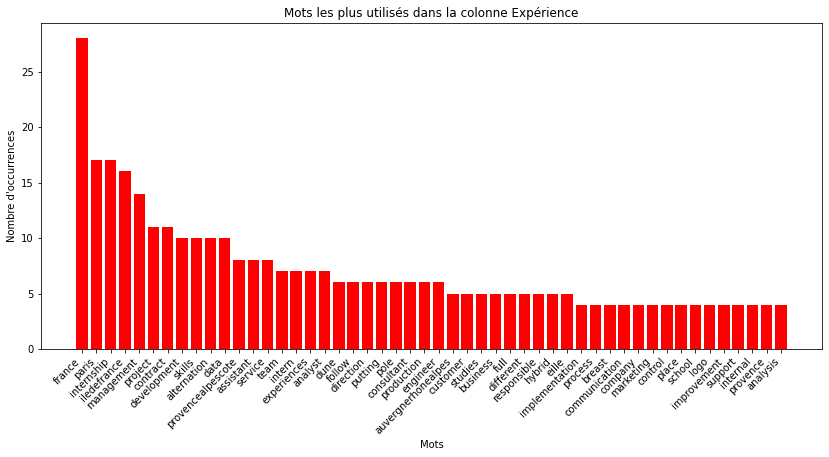

In [439]:
plt.figure(figsize=(14, 6))
plt.bar(top_words['Mot'], top_words['Occurrences'], color='red')
plt.title('Mots les plus utilisés dans la colonne Expérience')
plt.xlabel('Mots')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

In [440]:
all_jobs_text2 = ' '.join(df_clean2['Expérience'])

tokens2 = word_tokenize(all_jobs_text2)

stop_words2 = set(stopwords.words('english'))
filtered_tokens2 = [word2.lower() for word2 in tokens2 if word2.isalpha() and word2.lower() not in stop_words2]

word_counts2 = Counter(filtered_tokens2)

df_word_counts2 = pd.DataFrame(list(word_counts2.items()), columns=['Mot', 'Occurrences'])

df_word_counts2 = df_word_counts2.sort_values(by='Occurrences', ascending=False)

top_words2 = df_word_counts2.head(40)

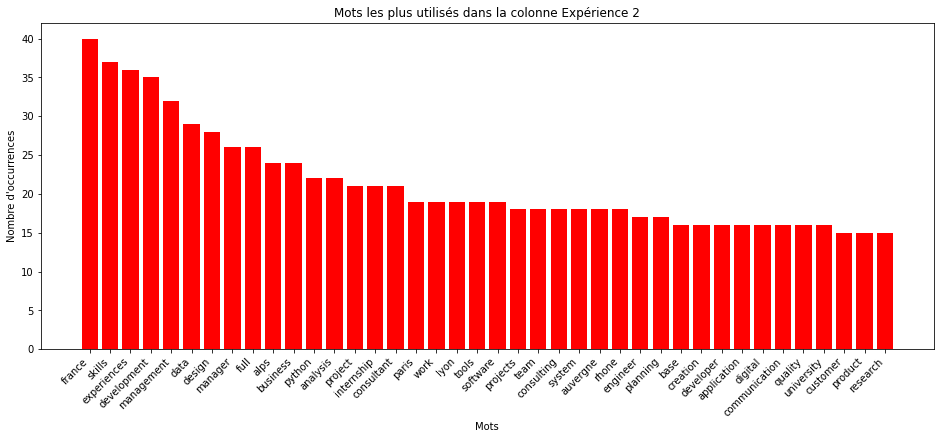

In [441]:
plt.figure(figsize=(16, 6))
plt.bar(top_words2['Mot'], top_words2['Occurrences'], color='red')
plt.title('Mots les plus utilisés dans la colonne Expérience 2')
plt.xlabel('Mots')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

### Mots les plus utilisés dans la colonne Formation.

In [442]:
all_infos_text = ' '.join(df_clean['Formation'])

tokens = word_tokenize(all_infos_text)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

word_counts = Counter(filtered_tokens)

df_word_counts = pd.DataFrame(list(word_counts.items()), columns=['Mot', 'Occurrences'])

df_word_counts = df_word_counts.sort_values(by='Occurrences', ascending=False)

top_words = df_word_counts.head(20)

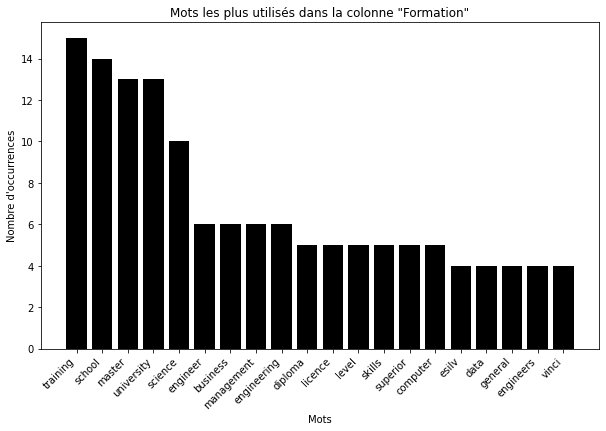

In [443]:
plt.figure(figsize=(10, 6))
plt.bar(top_words['Mot'], top_words['Occurrences'], color='black')
plt.title('Mots les plus utilisés dans la colonne "Formation"')
plt.xlabel('Mots')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

In [444]:
all_jobs_text2 = ' '.join(df_clean2['Formation'])

tokens2 = word_tokenize(all_jobs_text2)

stop_words2 = set(stopwords.words('english'))
filtered_tokens2 = [word2.lower() for word2 in tokens2 if word2.isalpha() and word2.lower() not in stop_words2]

word_counts2 = Counter(filtered_tokens2)

df_word_counts2 = pd.DataFrame(list(word_counts2.items()), columns=['Mot', 'Occurrences'])

df_word_counts2 = df_word_counts2.sort_values(by='Occurrences', ascending=False)

top_words2 = df_word_counts2.head(30)

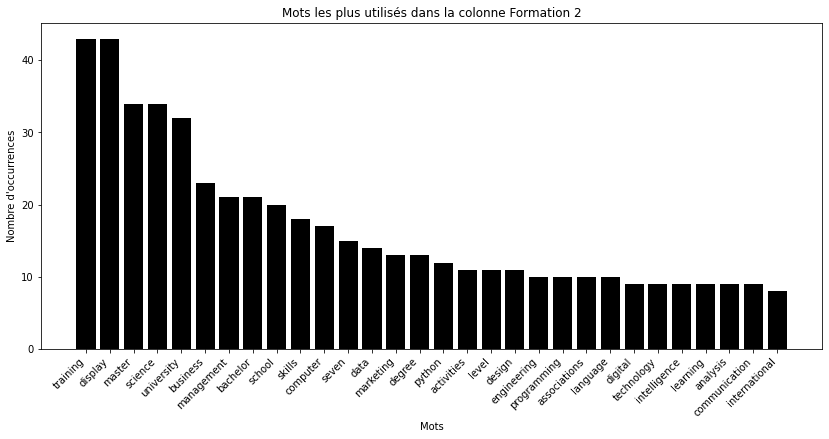

In [445]:
plt.figure(figsize=(14, 6))
plt.bar(top_words2['Mot'], top_words2['Occurrences'], color='black')
plt.title('Mots les plus utilisés dans la colonne Formation 2')
plt.xlabel('Mots')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

### Mots les plus utilisés dans la colonne Compétences.

In [446]:
all_infos_text = ' '.join(df_clean['Compétences'])

tokens = word_tokenize(all_infos_text)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

word_counts = Counter(filtered_tokens)

df_word_counts = pd.DataFrame(list(word_counts.items()), columns=['Mot', 'Occurrences'])

df_word_counts = df_word_counts.sort_values(by='Occurrences', ascending=False)

top_words = df_word_counts.head(10)

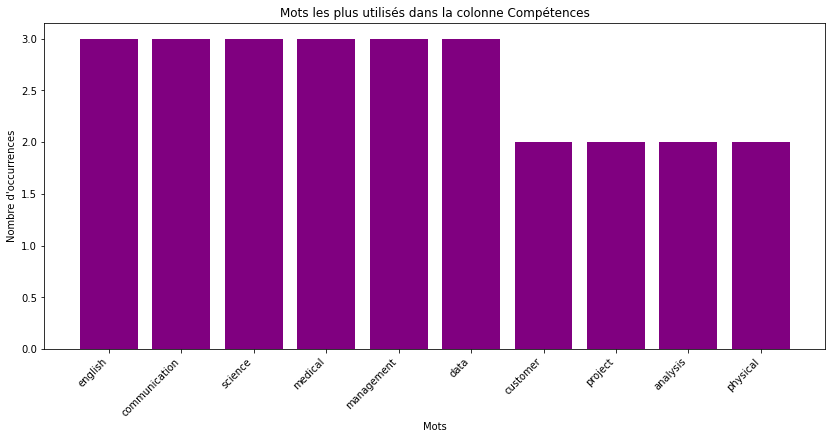

In [447]:
plt.figure(figsize=(14, 6))
plt.bar(top_words['Mot'], top_words['Occurrences'], color='purple')
plt.title('Mots les plus utilisés dans la colonne Compétences')
plt.xlabel('Mots')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()

In [448]:
all_jobs_text2 = ' '.join(df_clean2['Formation'])

tokens2 = word_tokenize(all_jobs_text2)

stop_words2 = set(stopwords.words('english'))
filtered_tokens2 = [word2.lower() for word2 in tokens2 if word2.isalpha() and word2.lower() not in stop_words2]

word_counts2 = Counter(filtered_tokens2)

df_word_counts2 = pd.DataFrame(list(word_counts2.items()), columns=['Mot', 'Occurrences'])

df_word_counts2 = df_word_counts2.sort_values(by='Occurrences', ascending=False)

top_words2 = df_word_counts2.head(30)

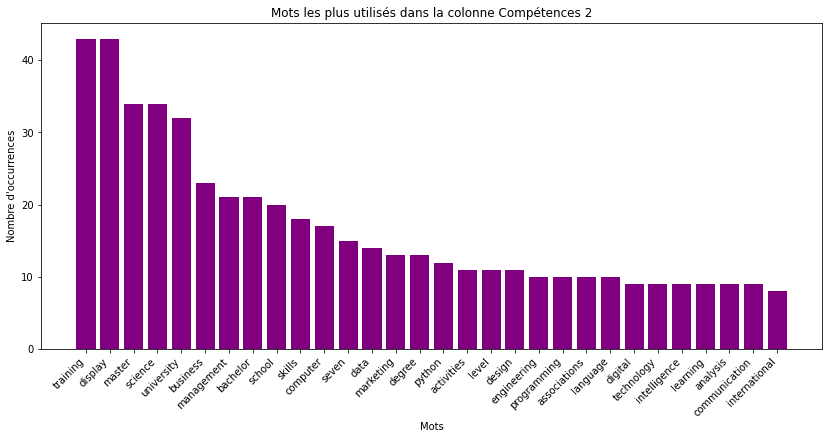

In [449]:
plt.figure(figsize=(14, 6))
plt.bar(top_words2['Mot'], top_words2['Occurrences'], color='purple')
plt.title('Mots les plus utilisés dans la colonne Compétences 2')
plt.xlabel('Mots')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45, ha='right')
plt.show()